In [8]:
#First step is importing .csv file using pandas library

import pandas as pd
df=pd.read_csv('C:\\Users\\YASH MUJUMDAR\\Downloads\\yes.csv')
df #display the dataset

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-June-2010,283.50,286.50,277.70,279.05,281.752234,240356,3285,67720840,71479.0,29.74,8.80,-4.45
1,2-June-2010,280.00,284.95,278.60,283.70,282.184346,161316,2729,45520850,20358.0,12.62,6.35,3.70
2,3-June-2010,285.10,297.15,284.55,295.50,292.633020,599076,8301,175309419,129463.0,21.61,12.60,10.40
3,4-June-2010,296.00,299.50,290.60,292.20,295.067545,965807,12453,284978300,236591.0,24.50,8.90,-3.80
4,7-June-2010,283.00,288.20,281.05,286.15,285.337724,309066,4243,88188189,49862.0,16.13,7.15,3.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,26-May-2020,27.00,28.10,26.40,27.40,27.290954,1001954,15346,27344281,302162.0,30.16,1.70,0.40
2475,27-May-2020,27.50,27.85,27.40,27.60,27.610476,847856,8742,23409708,313710.0,37.00,0.45,0.10
2476,28-May-2020,27.95,28.80,26.90,27.00,27.661311,1812274,21725,50129875,750979.0,41.44,1.90,-0.95
2477,29-May-2020,26.80,27.40,26.65,26.85,26.993985,1229232,11866,33181870,431913.0,35.14,0.75,0.05


In [15]:
#Calculate the number of missing values in the dataset

df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [10]:
#Using the describe() method, obtain statistical values for whole dataset and obtain the mean and standard deviation from the 
#statistical data

stat=df.describe()
stat.iloc[1:3]

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
mean,525.779891,533.424102,517.681969,525.377773,525.692306,2.083177e+06,15225.586930,3.471749e+08,4.235965e+05,25.234786,15.742134,-0.402118
std,401.877901,406.373240,398.409523,402.619439,402.412295,5.663892e+06,20517.689153,4.975016e+08,1.273192e+06,13.434851,12.311133,12.423576


In [12]:
#Obtaining the mean and standard deviation of open, high, low and close price yearly

df_stat=pd.read_csv('C:\\Users\\YASH MUJUMDAR\\Downloads\\yes.csv',parse_dates=['Date'],index_col='Date')
df_stat['year']=pd.to_datetime(df_stat.index)
df_stat.groupby(df_stat.year.dt.year)[['Open Price','High Price','Low Price','Close Price']].agg(['mean','std'])

Open Price               High Price                Low Price  \
             mean         std         mean         std         mean   
year                                                                  
2010   317.628808   29.752901   322.392715   30.072167   312.254636   
2011   287.950202   21.841148   292.711538   21.613308   282.354453   
2012   361.409960   46.863156   366.913147   46.457916   356.046813   
2013   420.082200   84.104303   426.949800   83.316833   410.911400   
2014   518.432582  129.636768   526.867213  131.260102   510.745902   
2015   793.496774   55.791922   803.520363   55.699733   780.873185   
2016  1041.548988  214.154629  1056.240486  215.888683  1028.244939   
2017  1201.416532  559.158338  1215.744153  565.997421  1189.047379   
2018   302.705691   66.789746   307.705081   66.513996   296.203659   
2019   131.212245   74.535016   134.536939   75.430941   126.854286   
2020    34.088235    8.555700    35.912255   10.003933    31.978431   

                  Close Price              
             std         mean         std  
year                                       
2010   29.012826   317.034106   29.453755  
2011   22.213807   287.157895   21.914957  
2012   46.945496   361.700598   46.557727  
2013   85.722155   418.543600   84.665757  
2014  128.375140   519.062500  130.233867  
2015   56.269718   791.557258   55.748914  
2016  212.877555  1042.822470  214.242988  
2017  554.539925  1202.350202  560.794746  
2018   67.641067   301.470528   67.118827  
2019   73.476799   130.111837   74.375146  
2020    7.959512    33.647059    8.267474

In [5]:
#Set the dataset index to 'Date' and resample the dataset yearly

df.set_index('Date')
df['Date']=pd.DatetimeIndex(df['Date'])
df.set_index('Date',inplace=True)
temp=df.resample('1Y').mean()
temp

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2010-12-31,317.628808,322.392715,312.254636,317.034106,317.407355,6.421485e+05,4624.463576,1.877398e+08,3.687744e+05,38.865430,10.138079,-0.594702
2011-12-31,287.950202,292.711538,282.354453,287.157895,287.570830,3.505179e+05,5292.870445,1.004913e+08,1.071759e+05,29.620810,10.357085,-0.792308
2012-12-31,361.409960,366.913147,356.046813,361.700598,361.754575,4.182539e+05,5020.513944,1.508379e+08,1.846306e+05,28.473506,10.866335,0.290637
2013-12-31,420.082200,426.949800,410.911400,418.543600,419.133298,1.031998e+06,20829.608000,3.552517e+08,2.054317e+05,20.832280,16.038400,-1.538600
2014-12-31,518.432582,526.867213,510.745902,519.062500,519.194875,5.224944e+05,14130.057377,2.457548e+08,1.170419e+05,21.214139,16.121311,0.629918
2015-12-31,793.496774,803.520363,780.873185,791.557258,792.309743,3.536929e+05,11679.012097,2.778517e+08,7.700725e+04,21.207298,22.647177,-1.939516
2016-12-31,1041.548988,1056.240486,1028.244939,1042.822470,1042.769881,2.967143e+05,8545.801619,2.963227e+08,6.363695e+04,19.490162,27.995547,1.273482
2017-12-31,1201.416532,1215.744153,1189.047379,1202.350202,1202.231221,3.597348e+05,6229.669355,2.916187e+08,1.548752e+05,31.166492,26.696774,0.933669
2018-12-31,302.705691,307.705081,296.203659,301.470528,301.974573,2.214175e+06,16205.178862,5.310148e+08,5.890397e+05,29.574350,11.501423,-1.235163


In [6]:
#Importing seaborn and matplotlib libraries to plot graphical representation of the resampled data

import seaborn as sns
import matplotlib.pyplot as plt

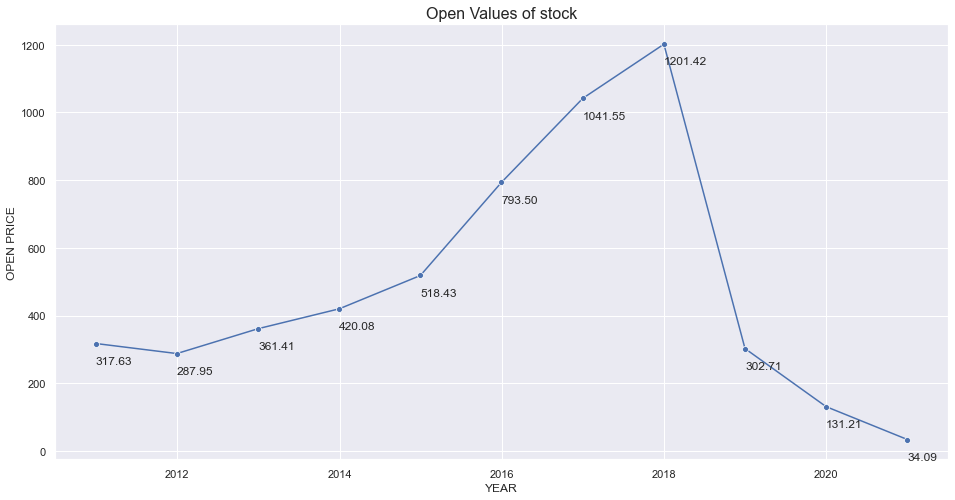

In [7]:
#Plotting Open Price graph

sns.set(rc={'figure.figsize':(16,8)})
g=sns.lineplot(x=temp.index,y=temp['Open Price'],style=1,markers=True,legend=False)
plt.xlabel('YEAR')
plt.ylabel('OPEN PRICE')
plt.rc('font',size=12) #font size
plt.rc('axes',titlesize=16) #font size used for title
plt.rc('axes',labelsize=12) #font used for axis labels
plt.rc('ytick',labelsize=12) #font used for points on yaxis (200,400,etc)
plt.title("Open Values of stock")
for x, y in zip(temp.index, temp['Open Price']):
    plt.text(x = x, y = y-60, s='{:.2f}'.format(y))
plt.show()

In [1]:
#Plotting Low Price graph

sns.set(rc={'figure.figsize':(16,8)})
g=sns.lineplot(x=temp.index,y=temp['Low Price'],style=1,markers=True,legend=False)
plt.xlabel('YEAR')
plt.ylabel('LOWEST PRICE')
plt.rc('font',size=12) #font size
plt.rc('axes',titlesize=16) #font size used for title
plt.rc('axes',labelsize=12) #font used for axis labels
plt.rc('ytick',labelsize=12) #font used for points on yaxis (200,400,etc)
plt.title("Low Values of stock")
for x, y in zip(temp.index, temp['Low Price']):
    plt.text(x = x, y = y-60, s='{:.2f}'.format(y))
plt.show()

NameError: name 'sns' is not defined

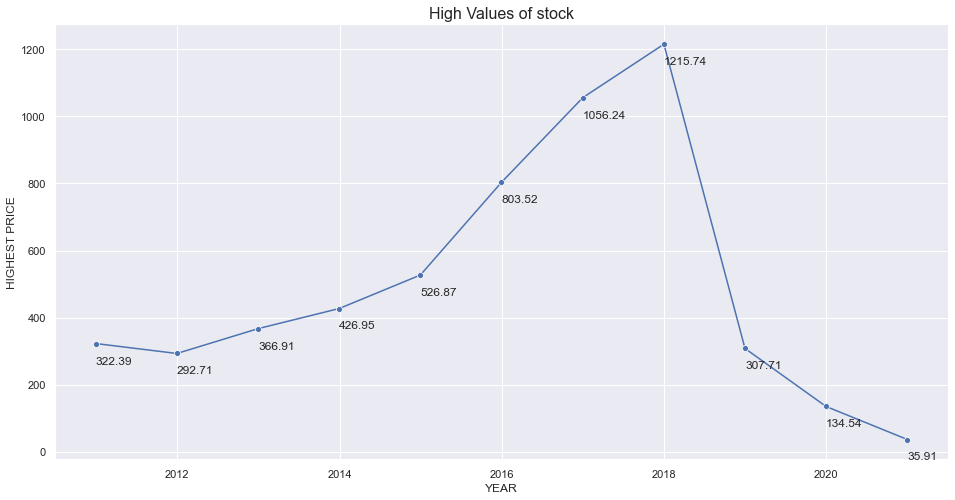

In [9]:
#Plotting High Price graph

sns.set(rc={'figure.figsize':(16,8)})
g=sns.lineplot(x=temp.index,y=temp['High Price'],style=1,markers=True,legend=False)
plt.xlabel('YEAR')
plt.ylabel('HIGHEST PRICE')
plt.rc('font',size=12) #font size
plt.rc('axes',titlesize=16) #font size used for title
plt.rc('axes',labelsize=12) #font used for axis labels
plt.rc('ytick',labelsize=12) #font used for points on yaxis (200,400,etc)
plt.title("High Values of stock")
for x, y in zip(temp.index, temp['High Price']):
    plt.text(x = x, y = y-60, s='{:.2f}'.format(y))
plt.show()

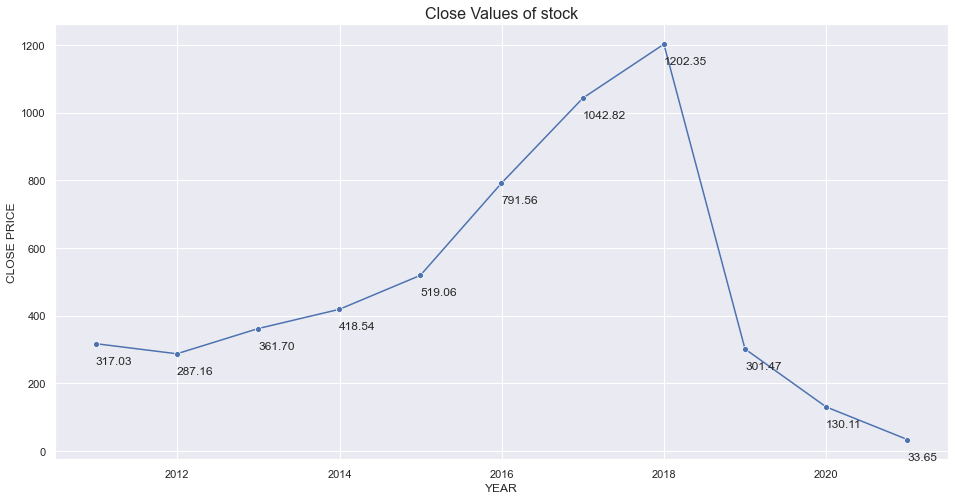

In [10]:
#Plotting Close Price graph

sns.set(rc={'figure.figsize':(16,8)})
g=sns.lineplot(x=temp.index,y=temp['Close Price'],style=1,markers=True,legend=False)
plt.xlabel('YEAR')
plt.ylabel('CLOSE PRICE')
plt.rc('font',size=12) #font size
plt.rc('axes',titlesize=16) #font size used for title
plt.rc('axes',labelsize=12) #font used for axis labels
plt.rc('ytick',labelsize=12) #font used for points on yaxis (200,400,etc)
plt.title("Close Values of stock")
for x, y in zip(temp.index, temp['Close Price']):
    plt.text(x = x, y = y-60, s='{:.2f}'.format(y))
plt.show()

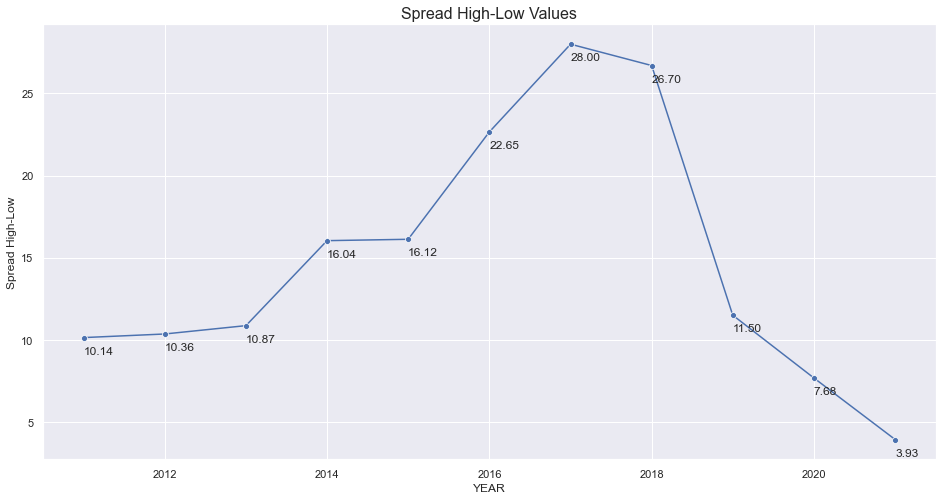

In [11]:
#Plotting Spread High - Low graph

sns.set(rc={'figure.figsize':(16,8)})
g=sns.lineplot(x=temp.index,y=temp['Spread High-Low'],style=1,markers=True,legend=False)
plt.xlabel('YEAR')
plt.ylabel('Spread High-Low')
plt.rc('font',size=12) #font size
plt.rc('axes',titlesize=16) #font size used for title
plt.rc('axes',labelsize=12) #font used for axis labels
plt.rc('ytick',labelsize=12) #font used for points on yaxis (200,400,etc)
plt.title("Spread High-Low Values")
for x, y in zip(temp.index, temp['Spread High-Low']):
    plt.text(x = x, y = y-1, s='{:.2f}'.format(y))
plt.show()

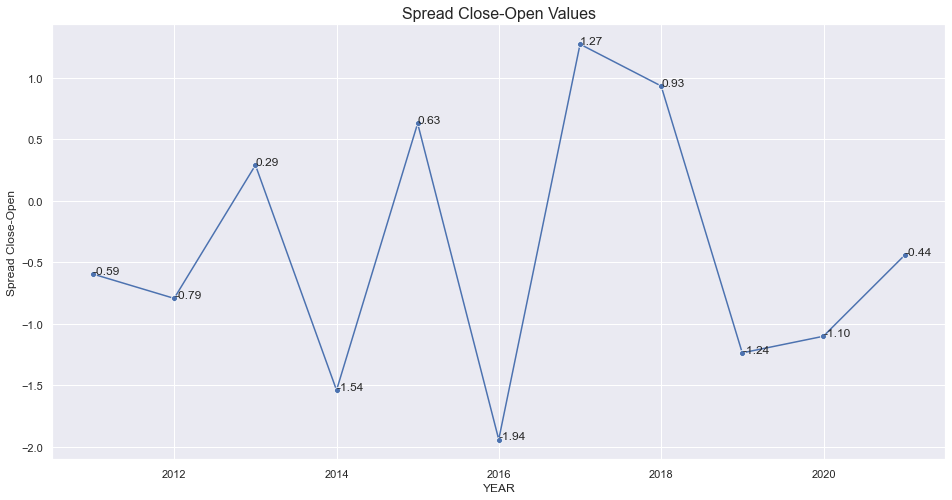

In [12]:
#Plotting Spread Close - Open graph

sns.set(rc={'figure.figsize':(16,8)})
g=sns.lineplot(x=temp.index,y=temp['Spread Close-Open'],style=1,markers=True,legend=False)
plt.xlabel('YEAR')
plt.ylabel('Spread Close-Open')
plt.rc('font',size=12) #font size
plt.rc('axes',titlesize=16) #font size used for title
plt.rc('axes',labelsize=12) #font used for axis labels
plt.rc('ytick',labelsize=12) #font used for points on yaxis (200,400,etc)
plt.title("Spread Close-Open Values")
for x, y in zip(temp.index, temp['Spread Close-Open']):
    plt.text(x = x, y = y, s='{:.2f}'.format(y))
plt.show()

In [13]:
#Performing Linear Regression using scikit library

def model_creator(text):
    import pandas as pd
    df=pd.read_csv('C:\\Users\\YASH MUJUMDAR\\Downloads\\yes.csv',parse_dates=['Date'],\
    usecols=['Date','Open Price', 'High Price', 'Low Price','No. of Trades',\
    'Total Turnover (Rs.)','Close Price'],index_col='Date') #Use 'Date' as index column for the dataset
    temp=df
    if text!='D':
        temp=df.resample(text).mean() #If the user inputs any other option except daily, the data is resampled accordingly
    print(len(temp))    #Gives the size of the dataset
    from sklearn.model_selection import train_test_split
    y=temp.pop("Close Price") #The data column to be predicted
    x_train,x_test,y_train,y_test=train_test_split(temp,y,test_size=0.2) #Splitting the dataset into 80% training dataset and 20% testing dataset
    from sklearn.linear_model import LinearRegression
    regr=LinearRegression()
    regr.fit(x_train,y_train) #training the model with training dataset
    print(regr.score(x_test,y_test)) #obtaining the score after passing the testing dataset
    return regr,x_test,y_test

text=input("Enter Y for Yearly, W for weekly, Q for quarterly or D for daily ") # Accept input from user
regr,x_test,y_test=model_creator(text.upper())

predicted=pd.DataFrame(regr.predict(x_test))
actual=pd.DataFrame(y_test)
actual.set_index(pd.RangeIndex(0,len(y_test),1),inplace=True)
result=pd.concat([actual,predicted],axis=1,ignore_index=True)
result.columns=['Actual','Predicted']
result #Plot the columns Actual Data v/s Predicted Data to see the difference

Enter Y for Yearly, W for weekly, Q for quarterly or D for daily D
2479
0.9998810951199609


,Actual,Predicted
0,407.60,410.777079
1,360.50,357.267021
2,578.75,575.168915
3,307.95,309.176194
4,552.25,562.245088
...,...,...
491,317.35,319.522015
492,328.55,327.112558
493,51.20,51.642518
494,307.90,308.947125


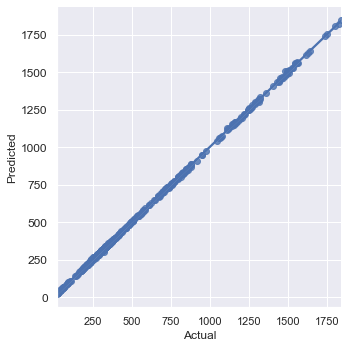

In [14]:
#Plotting the linear regression model graph using Seaborn library

import seaborn as sns
sns.lmplot(x='Actual',y='Predicted',data=result,legend=True)

In [15]:
#Using Scikit library to calculate the root mean squared error

from sklearn.metrics import mean_squared_error
print(mean_squared_error(actual,predicted)**(1/2))

4.244485837875419
